In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import random
import requests

# Introduction

Through this report, we attempt to find differences in profitibility between different industries

Data was extracted using the following api's from the Annual Business Survey

* API 1
* API 2
* API 3

Function used to call the api and return a dataframe

In [31]:
url = 'https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*'
key ="&key=7325759f1ae7120e7f55c22ccd6fe9de386a7a0c"

apiurl = url + key
def getDF(apiurl):
    response = requests.get(apiurl)

    col = response.json()[0] # header row

    test = pd.DataFrame(data = response.json(),columns = col) #makes data frame with the header row as column names
    test.drop(0,axis = 0,inplace=True) #it came with the header row that I dropped
    return test

# test = pd.DataFrame(data = response.json(),columns = col) #makes data frame with the header row as column names
# test.drop(0,axis = 0,inplace=True) #it came with the header row that I dropped
# test.head()

test = getDF(apiurl)
test.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,...,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F,us
1,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,3.0,None,8.9,None,7.7,None,7.0,None,1
2,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,4.7,None,19.2,None,0.0,None,13.5,None,1
3,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,4.7,None,8.2,None,4.8,None,7.4,None,1
4,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,5.9,None,4.3,None,5.6,None,6.3,None,1
5,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,6.0,None,16.2,None,6.7,None,10.7,None,1


Transforms the numeric columns from strings to integers

In [204]:
test['EMP'] = test['EMP'].map(lambda x: int(x))
test['FIRMPDEMP'] = test['FIRMPDEMP'].map(lambda x: int(x))
test['RCPPDEMP'] = test['RCPPDEMP'].map(lambda x: int(x))

# Visualizations



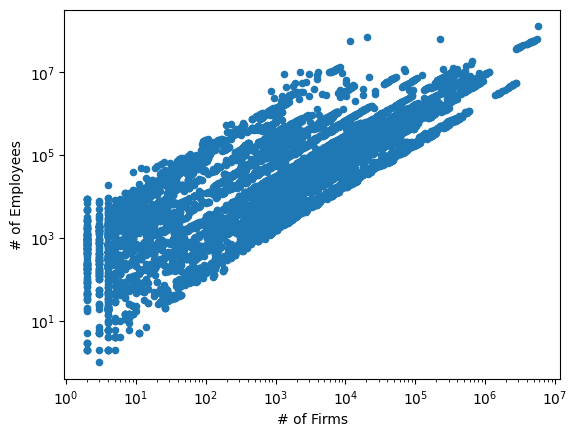

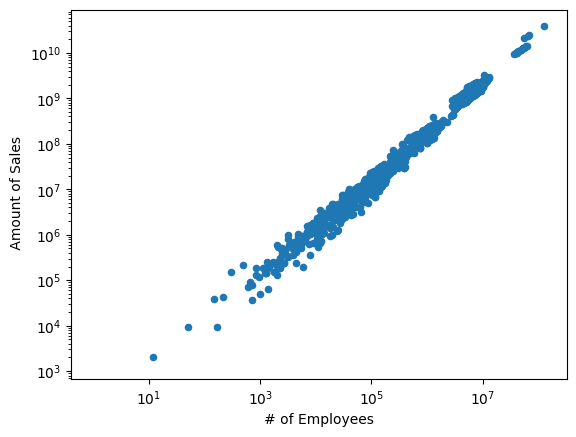

                                 NAICS2017_LABEL     EMP
1145  Agriculture, forestry, fishing and hunting  599905
1146  Agriculture, forestry, fishing and hunting       0
1147  Agriculture, forestry, fishing and hunting   26505
1148  Agriculture, forestry, fishing and hunting   25460
1149  Agriculture, forestry, fishing and hunting   27768


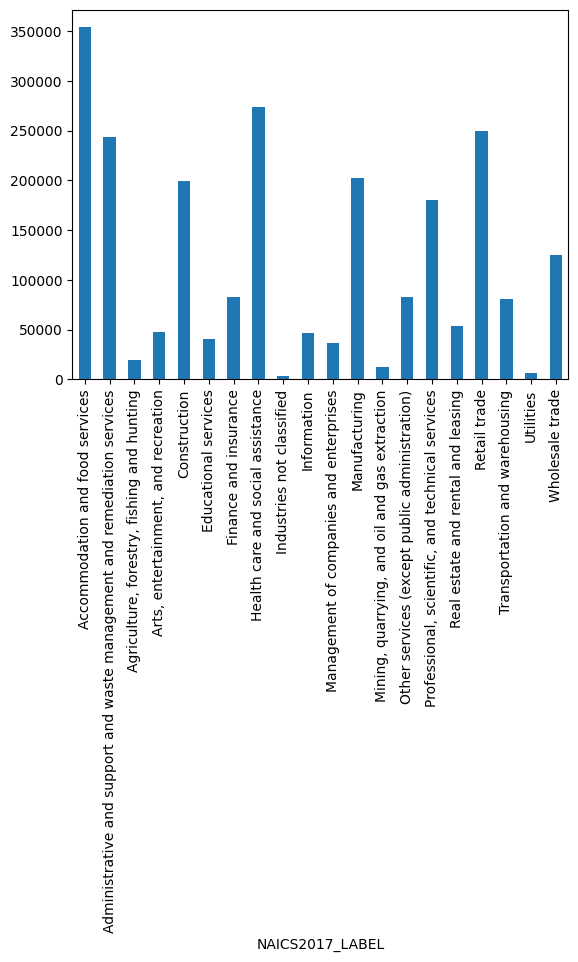

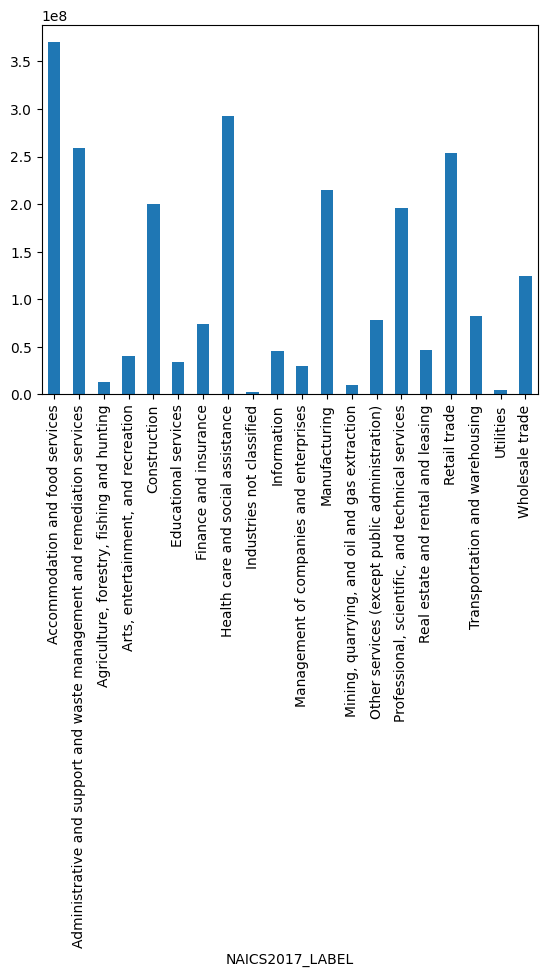

<AxesSubplot:xlabel='NAICS2017_LABEL'>

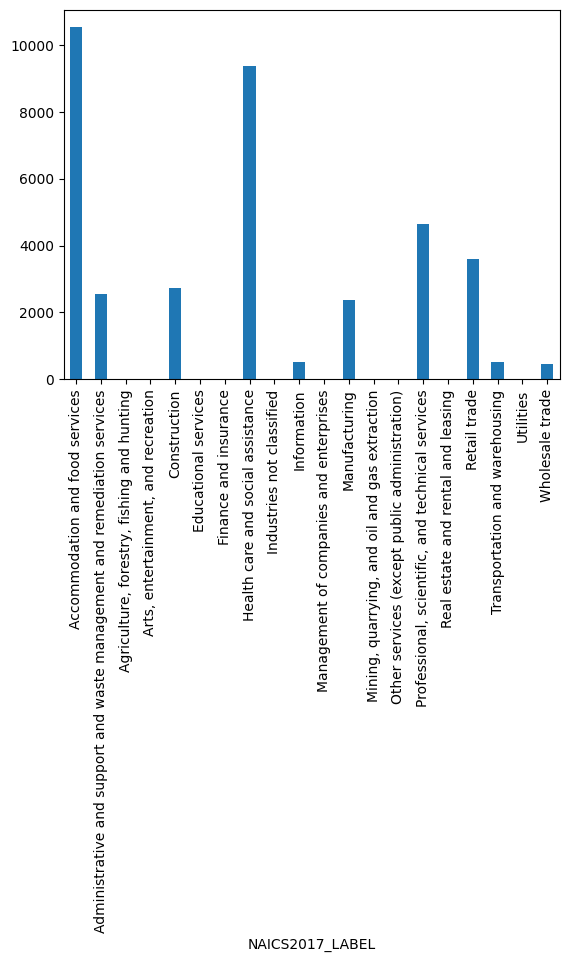

In [250]:
test.plot(x = 'FIRMPDEMP', y='EMP', kind='scatter', logx=True, logy=True, ylabel= '# of Employees', xlabel= '# of Firms')
plt.show()
test.plot(x= 'EMP', y= 'RCPPDEMP', kind = 'scatter', logx = True, logy = True, xlabel= '# of Employees', ylabel = ' Amount of Sales' )
plt.show()
allsectors = test[test['NAICS2017'] != '00']
allsectorsemployees = allsectors[['NAICS2017_LABEL', 'EMP']]
allsectorsemployees2 = allsectorsemployees.groupby('NAICS2017_LABEL').agg('mean')['EMP']
allsectorsemployees3 = allsectorsemployees.groupby('NAICS2017_LABEL').agg('sum')['EMP']
allsectorsemployees4 = allsectorsemployees.groupby('NAICS2017_LABEL').agg('median')['EMP']


print(allsectorsemployees.head())
# allsectorsemployees.agg(['min','mean','max'])['EMP']
allsectorsemployees2.plot(x='index', y='EMP', kind = 'bar')
plt.show()
allsectorsemployees3.plot(x='index', y='EMP', kind = 'bar')
plt.show()
allsectorsemployees4.plot(x='index', y='EMP', kind = 'bar')

# allsectorssales = allsectors.groupby('NAICS2017_LABEL').agg('sum')['']

                                  Veterans  Non-Veterans
EMPSZFI_LABEL                                           
Firms with 1 to 4 employees            251           297
Firms with 10 to 19 employees          208           285
Firms with 100 to 249 employees        144           260
Firms with 20 to 49 employees          192           287
Firms with 250 to 499 employees        127           230
Firms with 5 to 9 employees            230           287
Firms with 50 to 99 employees          152           264
Firms with 500 employees or more       136           247
Firms with no employees                236           295


<AxesSubplot:xlabel='EMPSZFI_LABEL'>

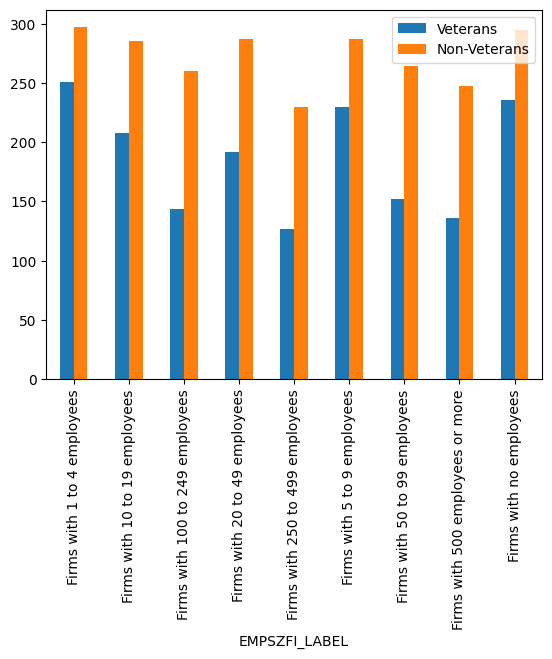

In [199]:
vets = test[ (test['VET_GROUP_LABEL'] == 'Veteran')]
vets = vets.rename({'VET_GROUP_LABEL':'Veterans'}, axis = 1)
vets.columns
vets2 = test[ test['VET_GROUP_LABEL'] == 'Nonveteran']
vets2 = vets2.rename({'VET_GROUP_LABEL' : 'Non-Veterans'}, axis = 1)

vets = vets[vets['NAICS2017'] != '00']
vets2 = vets2[vets2['NAICS2017'] != '00']
vets = vets[vets['EMPSZFI'] != '001']
vets2 = vets2[vets2['EMPSZFI'] != '001']
vets = vets.groupby('EMPSZFI_LABEL').agg('count')['Veterans']
vets2 = vets2.groupby('EMPSZFI_LABEL').agg('count')['Non-Veterans']
vets = pd.concat([vets, vets2], axis = 1)
vets.reset_index
vets.plot(y =['Veterans', 'Non-Veterans'], kind='bar', use_index=True)


Education of long term business owners

In [115]:
businessOwnerCharsURLEducation = "https://api.census.gov/data/2019/abscbo?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_F,OWNPDEMP_PCT,OWNPDEMP_PCT_F,OWNPDEMP_S,OWNPDEMP_S_F,OWNPDEMP_PCT_S,OWNPDEMP_PCT_S_F&for=us:*&QDESC_LABEL=EDUC"

#BOedu_apiurl = businessOwnerCharsURLEducation + key

educ = getDF(businessOwnerCharsURLEducation)

In [132]:
test['PAYANN']

1        21975675
2          499996
3         2808773
4         2601817
5         3506384
           ...   
19454           0
19455      108597
19456      112851
19457           0
19458           0
Name: PAYANN, Length: 19458, dtype: object

In [176]:
workerurl = "https://api.census.gov/data/2018/abscb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,EMPSZFI,EMPSZFI_LABEL,YIBSZFI,YIBSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*"
workers2 = getDF(workerurl)


In [210]:
workers = workers2
workers.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,...,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F,us
1,0100000US,United States,00,Total for all sectors,001,Total,001,Total,00,Total,...,None,9.4,None,18.8,None,9.4,None,11.2,None,1
2,0100000US,United States,00,Total for all sectors,001,Total,001,Total,00,Total,...,None,6.8,None,23.7,None,7.1,None,14.0,None,1
3,0100000US,United States,00,Total for all sectors,001,Total,001,Total,00,Total,...,None,13.3,None,38.5,None,12.9,None,20.3,None,1
4,0100000US,United States,00,Total for all sectors,001,Total,001,Total,00,Total,...,None,2.4,None,7.3,None,2.4,None,3.0,None,1
5,0100000US,United States,00,Total for all sectors,001,Total,001,Total,00,Total,...,None,9.9,None,18.1,None,10.4,None,14.4,None,1


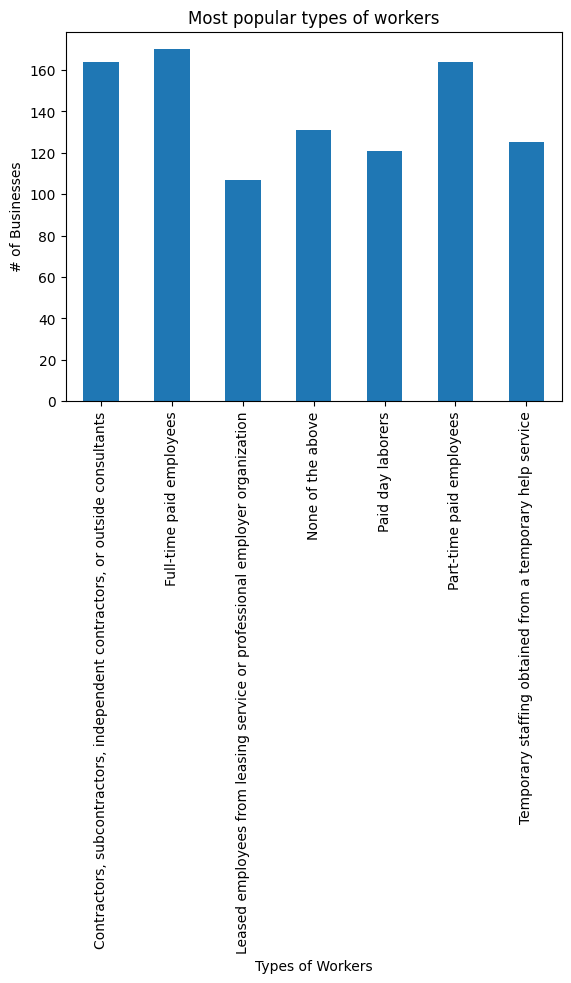

In [222]:
workers = workers[workers['QDESC_LABEL'] == 'WORKERS']
workers = workers[(workers['BUSCHAR_LABEL'] != 'Total reporting') & (workers['BUSCHAR_LABEL'] != 'Item not reported')]
largebusinessrace = workers.groupby('BUSCHAR_LABEL').agg('count')['SEX']
bx = largebusinessrace.plot(y='', kind='bar', use_index=True, title = 'Most popular types of workers', xlabel= 'Types of Workers', ylabel='# of Businesses')

In [209]:
newurl = 'https://api.census.gov/data/2018/abscb?get=NAICS2017,NAICS2017_LABEL,YIBSZFI,YIBSZFI_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL&for=us:*'